# RQ3

**1. What is the most common time in which users publish their posts?**


**2. Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.**


**3. Use the function that you created in the previous literal to plot the number of posts between the following time intervals:**


||Initial Time|Final Time|
|---|---|---|
| 1 | 06:00:00 | 10:59:59 |
| 2 | 11:00:00 |  13:59:59|
| 3 | 14:00:00 |  16:59:59|
| 4 | 17:00:00 |  19:59:59|
| 5 | 20:00:00 | 23:59:59|
| 6 | 00:00:00 | 02:59:59|
| 7 | 03:00:00 | 05:59:59|
|...|||

# 3.1 

In [5]:
import pandas as pd

In [6]:
posts =  pd.read_csv("~/instagram_posts.zip",delimiter="\t",nrows=1000000)#Increase up to len of dataframe

**Body of 3.1**

In [7]:
posts.isna().sum()
posts.cts.fillna("")

0         2017-08-06 20:06:57.000
1         2017-06-19 09:31:16.000
2         2017-03-11 20:05:03.000
3         2016-09-13 16:27:16.000
4         2015-10-18 10:19:27.000
                   ...           
999995    2019-05-29 19:44:40.000
999996    2018-11-01 23:19:05.000
999997    2018-10-07 21:19:42.000
999998    2018-09-29 16:55:38.000
999999    2018-02-09 19:10:59.000
Name: cts, Length: 1000000, dtype: object

**Convert to datetime and keeping only the hour:minute:second**

In [8]:
posts['cts'] = pd.to_datetime(posts.cts).dt.time


**STEP 1: Selecting only cts and post_id columns**


**STEP 2: Counting each row grouped by cts**

In [9]:

counter  =  posts[['cts','post_id']]
counter = posts.groupby('cts').post_id.count()

In [10]:
counter

cts
00:00:00     9
00:00:01    12
00:00:02    15
00:00:03    11
00:00:04     9
            ..
23:59:55    11
23:59:56    17
23:59:57     8
23:59:58     7
23:59:59    11
Name: post_id, Length: 86378, dtype: int64

**Calculating Maximum count of post**

In [11]:
maximum  = max(counter)
print(maximum)
result =  counter[counter == maximum]


37


**Returning the cts value corresponding to the maximum**

In [12]:
output  = str(result).replace("\n"," ")

output  = output[4:12]
print("The most common time in which users publish their posts is: ")
output

The most common time in which users publish their posts is: 


'19:05:33'

# 3.2

In [22]:
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

**time_interval(time_list,posts) takes as input a list of time intervals = time_list which its elements is a list of two datetime.time object. This two datetime.time objects delimit the interval.
The second input is the posts_dataframe.
Please use posts_cts_manager to cast every entries in posts_dataframe['cts'] column in the right object type(datatime.time)

In [45]:
def posts_cts_manager(post_dataframe):
    posts_dataframe['cts'] = pd.to_datetime(posts_dataframe.cts).dt.time

def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0
        for date in posts['cts']:
            if(time[0]<= date and time[1]>=date):
                counter[interval] += 1
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the quantity of post publications for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1
    return hist

# 3.3

**The following code checks if the user wants to use a custom input**

**If the user digits any char different from 1 the code will execute with default input**

**The code counts the number of posts published in each time interval given as input and plots the frequencies
in a histogram**

**The code calls time_interval function written above**


Digit 1 to insert custom input, other char will execute code with default


 0




Histogram with the quantity of post publications for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


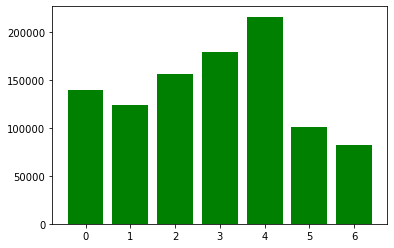

In [50]:
print("Digit 1 to insert custom input, other char will execute code with default")
if(input() ==  str(1)):
    print("\n")
    input_t = [] 
    print("Write number of intervals:")
    n = int(input())
    print("Insert "+str(n)+" time intervals: (example: 06:00:00 10:59:59)")
    for i in range(n):
        print("Interval #",i)
        input_t.append(list(input().split()))
else:
    print("\n")
    input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.show()